In [22]:
import pandas as pd
import numpy as np


In [23]:
df = pd.read_csv('filtered_data_75000.csv')

In [24]:
df.count()

Sugar_Level                  75000
Hb_Low                       75000
Hb_High                      75000
Age_LT_20                    75000
Age_20_25                    75000
Age_25_30                    75000
Age_30_35                    75000
Age_35_40                    75000
Age_40_45                    75000
Age_45_50                    75000
Age_50_55                    75000
Age_55_60                    75000
Age_60_65                    75000
Age_65_70                    75000
Age_GT_70                    75000
BMI_LT_18                    75000
BMI_18_20                    75000
BMI_20_22                    75000
BMI_22_24                    75000
BMI_24_26                    75000
BMI_26_28                    75000
BMI_28_30                    75000
BMI_30_32                    75000
BMI_GT_32                    75000
Diabetes                     75000
Prediabetes                  75000
Nodiabetes                   75000
BP_HIGH                      75000
BP_LOW              

In [28]:
outcomes = df.filter(['Nodiabetes','Diabetes', 'Prediabetes'],  axis=1)

In [29]:
features = df.drop(['Age_Group',
 'Sugar_Level',
 'Diabetes',
 'Prediabetes',
 'Nodiabetes'],  axis = 1)

In [30]:
features.shape[1]

41

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout 
from keras import optimizers

In [15]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=41))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from keras.utils import plot_model
#plot_model(model, to_file='model.png')
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [17]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(X_train, y_train, epochs=5,  batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.5993 - acc: 0.6829
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.5926 - acc: 0.6877
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.5914 - acc: 0.6889
Epoch 4/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.5906 - acc: 0.6896
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.5902 - acc: 0.6899


In [15]:
# Evaluate your performance in one line:
#loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

In [19]:
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test, batch_size=128)
#print('Accuracy: %.2f' % (accuracy*100))
print(accuracy)

15000/15000 [==============================] - 1s 42us/step
[0.5916186746279398, 0.6886666174570719]


In [20]:
#The predict method applies the trained model to inputs
#     to generate outputs
classes = model.predict(X_test, batch_size=128)
print(classes)

[[0.29099032 0.27874088 0.43153617]
 [0.46049666 0.14867996 0.40405723]
 [0.64206296 0.09139626 0.2525033 ]
 ...
 [0.5405446  0.17493087 0.27930441]
 [0.33275938 0.32435536 0.35218927]
 [0.22744499 0.38940468 0.39524862]]


In [34]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [43]:
import keras as k
k.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=41))
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='Adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from keras.utils import plot_model
#plot_model(model, to_file='model.png')
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [46]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(X_train, y_train, epochs=20,validation_split=0.1,shuffle=True, batch_size=128)
#model.fit(X_train, y_train, validation_data=(X_val, Y_val), 
#          callbacks=[TestCallback((X_test, Y_test))])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s 27us/step - loss: 0.5896 - acc: 0.6900 - val_loss: 0.5951 - val_acc: 0.6834
Epoch 2/20
54000/54000 [==============================] - 1s 24us/step - loss: 0.5891 - acc: 0.6900 - val_loss: 0.5945 - val_acc: 0.6844
Epoch 3/20
54000/54000 [==============================] - 1s 24us/step - loss: 0.5887 - acc: 0.6904 - val_loss: 0.5946 - val_acc: 0.6840
Epoch 4/20
54000/54000 [==============================] - 1s 24us/step - loss: 0.5882 - acc: 0.6913 - val_loss: 0.5949 - val_acc: 0.6843
Epoch 5/20
54000/54000 [==============================] - 1s 27us/step - loss: 0.5883 - acc: 0.6910 - val_loss: 0.5948 - val_acc: 0.6841
Epoch 6/20
54000/54000 [==============================] - 1s 26us/step - loss: 0.5875 - acc: 0.6915 - val_loss: 0.5952 - val_acc: 0.6831
Epoch 7/20
54000/54000 [==============================] - 1s 26us/step - loss: 0.5873 - acc: 0.6914 - val_loss: 0.5961 - val_acc:

In [47]:
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test, batch_size=128)
print(accuracy)

15000/15000 [==============================] - 0s 16us/step
[0.5888515111287435, 0.6896222365379333]


In [13]:
#The predict method applies the trained model to inputs
#     to generate outputs
classes = model.predict(X_test, batch_size=128)

In [14]:
print(classes)

[[0.31697407 0.30667225 0.3763537 ]
 [0.47363955 0.11473276 0.4116277 ]
 [0.5959633  0.11566526 0.28837147]
 ...
 [0.5335016  0.1526712  0.31382713]
 [0.37208423 0.2715619  0.35635385]
 [0.25383052 0.3768519  0.36931753]]


Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 5s 108us/step - loss: 0.5745 - acc: 0.6988 - val_loss: 0.5931 - val_acc: 0.6899
Epoch 2/50
45000/45000 [==============================] - 6s 123us/step - loss: 0.5748 - acc: 0.6995 - val_loss: 0.5934 - val_acc: 0.6899
Epoch 3/50
45000/45000 [==============================] - 5s 118us/step - loss: 0.5743 - acc: 0.6993 - val_loss: 0.5940 - val_acc: 0.6891
Epoch 4/50
45000/45000 [==============================] - 5s 115us/step - loss: 0.5740 - acc: 0.7002 - val_loss: 0.5937 - val_acc: 0.6899
Epoch 5/50
45000/45000 [==============================] - 6s 123us/step - loss: 0.5743 - acc: 0.7005 - val_loss: 0.5936 - val_acc: 0.6896
Epoch 6/50
45000/45000 [==============================] - 6s 126us/step - loss: 0.5737 - acc: 0.7003 - val_loss: 0.5938 - val_acc: 0.6894
Epoch 7/50
45000/45000 [==============================] - 9s 191us/step - loss: 0.5737 - acc: 0.7005 - val_loss: 0.5939 - 

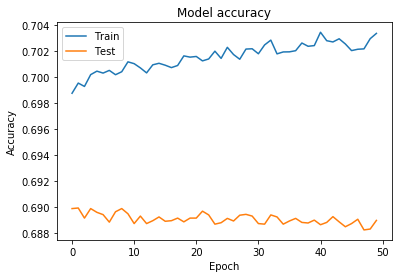

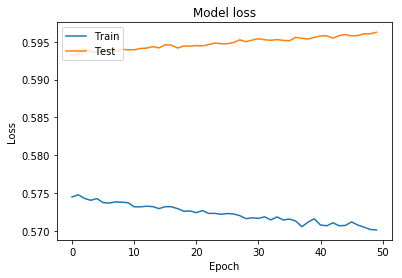

In [49]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [50]:
plt.show()